<a href="https://colab.research.google.com/github/JuanMCarreonCh/Colabs_Diplo_DSC/blob/main/03_Introducci%C3%B3n_al_aprendizaje_profundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aprendizaje profundo - Sesión 3  🧠**

> **Descripción:** Cuaderno de contenidos del módulo de aprendizaje profundo para el Dimplomado en Ciencia de Datos de la ENES UNAM León, 2024. <br>
> **Autor:** [Rodolfo Ferro](https://github.com/RodolfoFerro) <br>
> **Contacto:** [ferro@cimat.mx](mailto:ferro@cimat.mx)


## Contenido

### Sección I

1. Overfitting vs. Underfitting
2. Regularización:
    - Dropout
    - Early Stopping

### Sección II

3. Problemas de regresión

### Sección III

4. Problemas de clasificación

## **Sección I**

### **IMPORTANTE**

El contenido de esta sección ha sido descrito en su totalidad a través de la presentación.

Conviene revisar el material que puedes encontrar en el [repositorio](https://github.com/RodolfoFerro/modulo-deep-learning).

### **Ejemplo de Early Stopping**

In [ ]:
import tensorflow as tf
import numpy as np


# Sample data (XOR)
x = np.array([(0, 0), (1, 0), (0, 1), (1, 1)])
y = np.array([0, 1, 1, 0])


# Creates the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, activation='linear'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# Compile the model
loss = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.6)

model.compile(optimizer=optimizer, loss=loss, metrics=[loss])

In [ ]:
# Create a callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
history = model.fit(x, y, epochs=1000, callbacks=[callback])

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.2530 - mean_squared_error: 0.2530
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.2527 - mean_squared_error: 0.2527
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.2525 - mean_squared_error: 0.2525
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.2523 - mean_squared_error: 0.2523
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.2521 - mean_squared_error: 0.2521
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2519 - mean_squared_error: 0.2519
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2518 - mean_squared_error: 0.2518
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2516 - mean_squared_error: 0.2516
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2515 - mean_squared_error: 0.2515
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2514 - mean_squared_error: 0.2514
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/s

In [ ]:
import plotly.express as px


losses = history.history['loss']
eje_x = np.arange(len(losses))

fig = px.line(
    x=eje_x,
    y=losses,
    title='Historia de entrenamiento',
    labels=dict(x='Épocas', y='Error')
)
fig.show()

## **Sección II**

### **Regresión lineal 01**

Resolveremos este primer ejercicio creando una red neuronal sencilla con datos sintéticos.

In [ ]:
import numpy as np

x = np.linspace(0, 100, 101)
x

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

In [ ]:
y = x + 10 * np.random.random((len(x)))
y

array([  5.58799024,   5.56623396,   2.8909899 ,  12.27583474,
         9.80540052,  11.97315675,  13.98437422,  16.21045125,
        15.81246423,   9.9382936 ,  14.09198269,  11.05481327,
        19.8242149 ,  19.11827757,  18.18188768,  20.17197213,
        19.95737016,  24.00976099,  24.40559091,  21.57345889,
        29.44565019,  29.53952458,  22.23098311,  31.22807915,
        29.934516  ,  25.64565551,  26.99594778,  32.37941793,
        37.27098635,  30.14116375,  39.2112914 ,  37.05569227,
        41.82939218,  42.34922933,  43.93369978,  40.96949402,
        43.2846652 ,  38.90502879,  43.31204597,  48.49720282,
        48.00566418,  41.7751397 ,  49.24627555,  43.91805585,
        47.96426551,  52.05634151,  51.47026377,  52.15968296,
        51.65916012,  50.12491469,  55.09790912,  56.73275125,
        60.39409439,  55.35425966,  54.22836513,  55.50516126,
        56.70467885,  66.81150501,  59.39038371,  60.88954275,
        65.66311471,  66.06199074,  65.33466786,  72.52

In [ ]:
import plotly.express as px


fig = px.scatter(x=x, y=y)
fig.show()

### **Modelo**

Por la simplicidad de los datos, podemos intentar realizar el ajuste de una recta, por lo que una simple neurona artificial bastará para modelar la ecuación $y=mx+b$.

El peso entrenado corresponderá a la pendiente $m$ de la ecuación y el _bias_ al valor de intersección $b$.

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input([1])) # Hint: Input layer is Input([1])
model.add(tf.keras.layers.Dense(1, activation="linear")) # Hint: Output layer is Dense(1) w/linear activation

In [ ]:
model.predict(np.array([2]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[0.7005327]], dtype=float32)

In [ ]:
model.get_weights()

[array([[0.35026634]], dtype=float32), array([0.], dtype=float32)]

### **Optimizador y función de pérdida**

$$ \mathrm{MSE}=\frac{1}{N}\cdot\sum_{i=1}^N \left(y_i- \hat{y}_i \right )^2 $$

In [ ]:
# TODO: Create loss function and optimizer
loss = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-1) # Try SGD(learning_rate=1e-5) / Adam(learning_rate=1e-1)

> **¿Qué es ADAM?** $\rightarrow$ https://www.geeksforgeeks.org/adam-optimizer/

In [ ]:
# TODO: Add optimizer and loss to model compilation
model.compile(loss=loss, optimizer=optimizer, metrics=[loss])

In [ ]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

### **Entrenamiento del modelo**

In [ ]:
history = model.fit(x, y, epochs=120)

Epoch 1/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 1427.1434 - mean_squared_error: 1355.3373
Epoch 2/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 237.4085 - mean_squared_error: 223.9562 
Epoch 3/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33.8680 - mean_squared_error: 39.3367 
Epoch 4/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 181.7560 - mean_squared_error: 193.6662 
Epoch 5/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 163.7925 - mean_squared_error: 161.7530 
Epoch 6/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43.6345 - mean_squared_error: 42.3708 
Epoch 7/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.0900 - mean_squared_error: 24.5743 
Epoch 8/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56.8765 - mean_squared_error: 57.7112 
Epoch 9/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 45.6297 - mean_squared_error: 44.3597 
Epoch 10/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.2247 - mean_squared_error: 18.5805 
Epoch 11/120
4/4 ━━━━━━━━━━━━

In [ ]:
import plotly.express as px


losses = history.history['loss']
eje_x = np.arange(len(losses))

fig = px.line(
    x=eje_x,
    y=losses,
    title='Historia de entrenamiento',
    labels=dict(x='Épocas', y='Error')
)
fig.show()

In [ ]:
# Build output over original x
y_pred_model = model.predict(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [ ]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(
    go.Scatter(x=x, y=y, mode='markers', name='Datos crudos')
)
fig.add_trace(
    go.Scatter(x=x, y=y_pred_model.flatten(), mode='lines', name='Modelo ajustado')
)

fig.show()

### **Evaluación del modelo**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# MSE
y_pred_model = model.predict(x)
print("MSE:", mean_squared_error(y, y_pred_model))

# R2
print("R^2:", r2_score(y, y_pred_model))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MSE: 9.025182937890206
R^2: 0.989190062742762


> - **Métricas de regresión:** https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
> - **Coeficiente de determinación:** https://en.wikipedia.org/wiki/Coefficient_of_determination

In [ ]:
w, b = model.get_weights()
w, b = w[0][0], b[0]
w, b

(0.98628765, 5.5136642)

### **Reconstrucción del modelo**

In [ ]:
y_reconstructed = x * w + b

In [ ]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(
    go.Scatter(x=x, y=y, mode='markers', name='Datos crudos')
)
fig.add_trace(
    go.Scatter(x=x, y=y_reconstructed, mode='lines', name='Modelo ajustado')
)

fig.show()

---

### **Regresión 02**

Ahora vamos a resolver un problema de regresión no necesariamente lineal.

In [ ]:
import numpy as np


x = np.linspace(-4 * np.pi, 4 * np.pi, 10000)
y = np.sin(x) + 0.5 * np.random.randn(len(x))

In [ ]:
import plotly.express as px


fig = px.scatter(x=x, y=y)
fig.show()

### **Modelo**

In [ ]:
import tensorflow as tf


# TODO: Build the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input([1])) # Hint: Input layer is Input([1])
# TODO: Create at least 1 hidden layer
model.add(tf.keras.layers.Dense(32,activation='sigmoid'))
model.add(tf.keras.layers.Dense(128,activation='tanh'))
model.add(tf.keras.layers.Dense(64,activation='sigmoid'))
model.add(tf.keras.layers.Dense(1,activation='linear')) # Hint: Output layer is Dense(1) w/linear activation

### **Optimizador y función de pérdida**

$$ \mathrm{MSE}=\frac{1}{N}\cdot\sum_{i=1}^N \left(y_i- \hat{y}_i \right )^2 $$

In [ ]:
# TODO: Create loss function and optimizer
loss = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=1.25e-3) # Try Adam(learning_rate=1e-3)

In [ ]:
# TODO: Integrate all here!
model.compile(loss=loss, optimizer=optimizer, metrics=[loss])

In [ ]:
model.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_49 (Dense)                     │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,609 (49.25 KB)

 Trainable params: 12,609 (49.25 KB)

 Non-trainable params: 0 (0.00 B)

### **Entrenamiento del modelo**

In [ ]:
history = model.fit(x, y, epochs=100)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7510 - mean_squared_error: 0.7510
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7138 - mean_squared_error: 0.7138
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7332 - mean_squared_error: 0.7332
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7084 - mean_squared_error: 0.7084
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7025 - mean_squared_error: 0.7025
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6903 - mean_squared_error: 0.6903
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6560 - mean_squared_error: 0.6560
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6389 - mean_squared_error: 0.6389
Epoch 9/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6366 - mean_squared_error: 0.6366
Epoch 10/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6259 - mean_squared_error: 0.6259
Epoch 11/100
313/313 ━━━━━━━━

In [ ]:
import plotly.express as px


losses = history.history['loss']
eje_x = np.arange(len(losses))

fig = px.line(
    x=eje_x,
    y=losses,
    title='Historia de entrenamiento',
    labels=dict(x='Épocas', y='Error')
)
fig.show()

### **Reconstrucción del modelo**

In [ ]:
# Build output over original x
y_pred_model = model.predict(x)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(
    go.Scatter(x=x, y=y, mode='markers', name='Datos crudos')
)
fig.add_trace(
    go.Scatter(x=x, y=y_pred_model.flatten(), mode='lines', name='Modelo ajustado')
)

fig.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# MSE
y_pred_model = model.predict(x)
print("MSE:", mean_squared_error(y, y_pred_model))

# R2
print("R^2:", r2_score(y, y_pred_model))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MSE: 0.2746296852658699
R^2: 0.6308884152105558


<center>
    *********
</center>

## **Sección III – Ejercicio**

### **Clasificación 01**

Para este problema utilizaremos un dataset sintético ya conocido:

In [ ]:
from sklearn.datasets import make_circles
import numpy as np


# Make 1000 examples
n_samples = 1000

# Create circles
x, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
import pandas as pd


circles = pd.DataFrame({"x1": x[:, 0], "x2": x[:, 1], "label":y})
circles.head()

,x1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [ ]:
# Verify number of labels
circles.label.value_counts()

,count
label,
1,500
0,500


In [ ]:
import plotly.express as px


fig = px.scatter(
    x=circles['x1'],
    y=circles['x2'],
    color=circles['label'].astype(str) # Discretize the color palette
)
fig.show()

### **Modelo**

In [ ]:
import tensorflow as tf


# TODO: Create the model using the Sequential API

# Hint - You can try:
#  - Input(2)
#  - Hidden layers - tanh
#  - Output layer(1) - sigmoid
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input([2])) # Hint: Input layer is Input([1])
model.add(tf.keras.layers.Dense(4,activation='sigmoid'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid')) # Hint: Output layer is Dense(1) w/linear activation

### **Optimizador y función de pérdida**

$$ \mathrm{Binary Crossentropy}=-\frac{1}{N}\cdot\sum_{i=1}^N \left[y_i \log (\hat{y}_i) + (1 - y_i) \log (1 - \hat{y}_i) \right] $$


In [ ]:
# TODO: Create loss function and optimizer
loss = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.3) # Try Adam(learning_rate=3e-3)

In [ ]:
# TODO: Integrate all here!
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_65 (Dense)                     │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

### **Entrenamiento del modelo**

In [ ]:
history = model.fit(x, y, epochs=150)

Epoch 1/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4682 - loss: 0.7689
Epoch 2/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4835 - loss: 0.6942   
Epoch 3/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5220 - loss: 0.6801 
Epoch 4/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6347 - loss: 0.6366 
Epoch 5/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6614 - loss: 0.5938 
Epoch 6/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7355 - loss: 0.5452
Epoch 7/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8024 - loss: 0.4372 
Epoch 8/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8650 - loss: 0.3522 
Epoch 9/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8603 - loss: 0.3319 
Epoch 10/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8821 - loss: 0.2894
Epoch 11/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9107 - loss: 0.2634 
Epoch 12/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

In [ ]:
import plotly.express as px


losses = history.history['loss']
eje_x = np.arange(len(losses))

fig = px.line(
    x=eje_x,
    y=losses,
    title='Historia de entrenamiento',
    labels=dict(x='Épocas', y='Error')
)
fig.show()

In [ ]:
import plotly.express as px


losses = history.history['accuracy']
eje_x = np.arange(len(losses))

fig = px.line(
    x=eje_x,
    y=losses,
    title='Historia de entrenamiento',
    labels=dict(x='Épocas', y='Accuracy')
)
fig.show()

### **Evaluación del modelo**

In [ ]:
model.evaluate(x, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9945 - loss: 0.0300


[0.030205437913537025, 0.9940000176429749]

In [ ]:
y_pred = model.predict(x)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
def binarize_output(y_pred, threshold=0.5):
    return np.array([1 if x > threshold else 0 for x in y_pred])

In [ ]:
from sklearn.metrics import accuracy_score


y_pred_bin = binarize_output(y_pred)
print("Accuracy score:", accuracy_score(y, y_pred_bin))

Accuracy score: 0.994


> - **Métricas de clasificación:** https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [ ]:
import plotly.express as px


fig = px.scatter(
    x=circles['x1'],
    y=circles['x2'],
    color=y_pred_bin.flatten().astype(str) # Discretize the color palette
)
fig.show()

---

### **Clasificación 02**

Ahora utilizaremos un conjunto de datos un poco más complejo: el **MNIST dataset**.

El dataset está compuesto por imágenes de 28x28 pixeles, que contienen un conjunto de dígitos en 10 categorías.

Los datos de MNIST están disponibles directamente en la API de conjuntos de datos de `tf.keras`. Los cargas así:

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

Llamar a `load_data` en este objeto nos dará dos conjuntos con los valores de entrenamiento y prueba para los gráficos que contienen las prendas y sus etiquetas.

In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

¿Cómo se ven estos valores?

Imprimamos una imagen de entrenamiento y una etiqueta de entrenamiento para ver.

Label: 9
Matrix: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 128 128 255 255 255 191  64   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 128 255 255 255 255 255 255 255 255 128   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 191 255 255 255 255 2

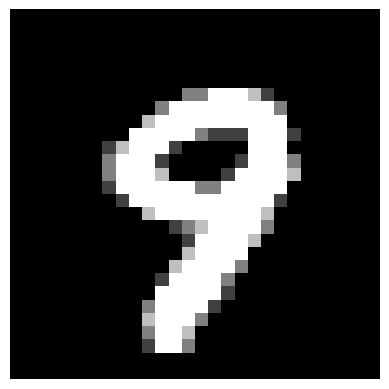

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)


# Set index of image to be seen
img_index = 5999 # 6000 -1

# Plot image
plt.imshow(training_images[img_index], cmap='gray')
plt.axis(False)

print('Label:', training_labels[img_index])
print('Matrix:', training_images[img_index])

### **Preparación de los datos**

Notarás que todos los valores están entre 0 y 255. Si estamos entrenando una red neuronal, por varias razones es más fácil si transformamos los valores para tratar todos con valores entre 0 y 1. Este proceso se llama **estandarización**.

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Label: 9
Matrix: [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         

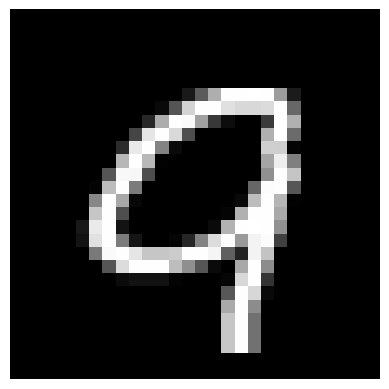

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)


# Set index of image to be seen
img_index = 3000 # 6000 -1

# Plot image
plt.imshow(training_images[img_index], cmap='gray')
plt.axis(False)

print('Label:', training_labels[img_index])
print('Matrix:', training_images[img_index])

In [ ]:
training_images[0].shape

(28, 28)

### **Modelo**



In [ ]:
# TODO: Create the model using the Sequential API
# Hint - You can try:
#  - Flatten()
#  - Hidden layers - relu
#  - Output layer(10) - softmax
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) # Hint: Input layer is Input([1
model.add(tf.keras.layers.Dense(128,activation='relu'))
#{
# 0,
# 1,
# ...,
# 9
#}
model.add(tf.keras.layers.Dense(10,activation='softmax')) #  - Output layer(10) - softmax

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



> **Softmax Activation Function: Everything You Need to Know** - https://www.pinecone.io/learn/softmax-activation/


### **Optimizador y función de pérdida**

In [ ]:
# TODO: Create loss function and optimizer
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD() # Try SGD()

In [ ]:
# TODO: Integrate everything here!
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy']
)

### **Entrenamiento del modelo**

Para entrenar el modelo, simplemente utilizamos el método `.fit()` del modelo.

In [ ]:
history = model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7373 - loss: 1.0075
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9030 - loss: 0.3506
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9176 - loss: 0.2967
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9260 - loss: 0.2651
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9345 - loss: 0.2387
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9402 - loss: 0.2192
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9427 - loss: 0.2075
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9445 - loss: 0.1978
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9491 - loss: 0.1804
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9548 - loss: 0.1644



> **Pregunta clave:** ¿Qué sucede con la historia de entrenamiento?

In [ ]:
import plotly.express as px


seen = 'accuracy' # or 'loss'

hist_values = history.history[seen]
eje_x = np.arange(len(hist_values))

fig = px.line(
    x=eje_x,
    y=hist_values,
    title='Historia de entrenamiento',
    labels=dict(x='Épocas', y=seen.capitalize())
)
fig.show()

### Evaluación del modelo

In [ ]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9443 - loss: 0.1906


[0.1620631366968155, 0.9531000256538391]

### Predicción


Label: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Prediction: 3


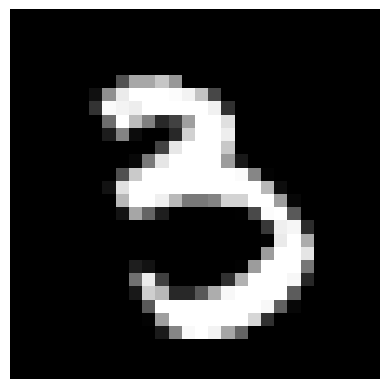

In [ ]:
import random

test_index = random.randint(0, 10000 - 1)

plt.imshow(test_images[test_index], cmap='gray')
plt.axis(False)

print('Label:', test_labels[test_index])
input_image = np.reshape(test_images[test_index], (1, 784))
prediction = model.predict(np.expand_dims(input_image, axis=-1))
print('Prediction:', np.argmax(prediction))

In [ ]:
prediction

array([[2.7971678e-06, 6.8562936e-06, 2.8588129e-06, 9.9413705e-01, 1.2925407e-06, 5.5722599e-03, 2.0225083e-07, 1.4018233e-05, 2.2090624e-04, 4.1758376e-05]], dtype=float32)

> **Para resolver el reto es:** Mejorar el accuracy obtenido en la clase.

**Puedes explorar:**
- El número de capas.
- Las épocas de entrenamiento.
- Las funciones de activación.
- Investigar otras capas.

--------

> Contenido creado por **Rodolfo Ferro**, 2024. <br>
> Para cualquier retroalimentación, puedes contactarme a través del correo [ferro@cimat.mx](mailto:ferro@cimat.mx).